**<center> <span style="color:#a10303;font-family:serif; font-size:34px;"> TELECOM CUSTOMER CHURN PREDICTION USING ANN📈</span> </center>**

# <span style="font-family:serif; font-size:28px;"> Introduction</span>  

**Dataset Overview:**  
The dataset contains information about **customer behavior** and **demographics** for a telecom company. It includes details such as service subscriptions, contract types, payment methods, and customer tenure.  

**Objective:**  
Analyze **customer churn patterns** to identify key factors contributing to churn and provide **actionable insights** to reduce customer attrition.  

**Dealing with Imbalanced Data:**  
Customer churn datasets are often **highly imbalanced**, with significantly fewer customers classified as churned compared to non-churned. To address this imbalance:
- **Over-sampling techniques** (e.g., **SMOTE**) are applied **only to the training data**.  
- The **test data remains untouched** to ensure that the model is evaluated on **real, unseen data**, providing an **unbiased assessment** of its generalization ability.  

This approach ensures that the model learns effectively from balanced data while still being tested on a realistic distribution, leading to **more reliable performance metrics**.

# <span style="font-family:serif; font-size:28px;"> Dataset Details</span>

**Key Information:**

Rows: 7,043

Columns: 21

Target Variable: Churn (Yes/No)

# Loading libraries and data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
cd /content/drive/MyDrive/Projets_2024/Professional_Training /training HUb/Data Analytics/Churn/

/content/drive/MyDrive/Projets_2024/Professional_Training /training HUb/Data Analytics/Churn


In [40]:
ls

Churn.csv  customer-churn-ann.ipynb  iframe_figures/


In [41]:
# read xls file as a dataframe
df = pd.read_csv('Churn.csv')


In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
display(pd.crosstab(df['PaperlessBilling'], columns='% observations'
                    ,normalize=True))

col_0,% observations
PaperlessBilling,
No,0.407781
Yes,0.592219


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
# convert TotalCharges which is srting frmat to float format
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# df["TotalCharges"]=df["TotalCharges"].astype("float64")

In [44]:
display(pd.crosstab(df['PaymentMethod'], columns='% observations'
                    ,normalize=True))

col_0,% observations
PaymentMethod,
Bank transfer (automatic),0.219225
Credit card (automatic),0.216101
Electronic check,0.335794
Mailed check,0.228880


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
df.duplicated().sum()

0

In [50]:
pd.crosstab(index=df['PaymentMethod'], columns=df['Churn']
              ,values=df['MonthlyCharges'],
              aggfunc="mean",
              normalize="index")

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.455130,0.544870
Credit card (automatic),0.454925,0.545075
Electronic check,0.485389,0.514611
Mailed check,0.431466,0.568534


In [51]:
pd.crosstab(index=df['Contract'], columns=df['Churn']
              ,values=df['TotalCharges'],
              aggfunc="mean",
              normalize="index")

Churn,No,Yes
Contract,,
Month-to-month,0.566533,0.433467
One year,0.416594,0.583406
Two year,0.403781,0.596219


In [52]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Exploratory Data Analysis (EDA)

**Demographic Analysis**

Gender Distribution

In [ ]:
fig = px.pie(df, names='gender', title='Gender Distribution',color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(xaxis_title='Chest Pain Type', yaxis_title='Count')
fig.show()

Insight: Compare churn rates between male and female customers.

In [ ]:
fig = px.histogram(df, x='gender', color='Churn', title='Churn Rate by Gender', barmode='group',color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(xaxis_title='Chest Pain Type', yaxis_title='Count')
fig.show(renderer='iframe')

Insight: Understand how long customers typically stay with the company.

In [ ]:
fig = px.histogram(df, x='tenure', color='Churn', marginal='box', title='Distribution of Tenure')
fig.show(renderer='iframe')

Insight: Analyze how phone service affects churn.
python
Copy code


In [ ]:
fig = px.histogram(df, x='InternetService', color='Churn', title='Churn by Internet Service Type', barmode='group',color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(xaxis_title='Chest Pain Type', yaxis_title='Count')
fig.show(renderer='iframe')

Insight: Analyze how phone service affects churn.

In [ ]:
fig = px.histogram(df, x='PhoneService', color='Churn', title='Phone Service vs Churn', barmode='group',color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(xaxis_title='Chest Pain Type', yaxis_title='Count')
fig.show(renderer='iframe')

**Financial Insights**

**Insight: Analyze monthly charges among churned and non-churned customers.**


In [ ]:
fig = px.box(df, x='Churn', y='MonthlyCharges', color='Churn', title='Monthly Charges Distribution')
fig.show(renderer='iframe')

In [ ]:
fig = px.histogram(df, x='PaymentMethod', color='Churn', title='Churn by Payment Method', barmode='group',color_discrete_sequence=['skyblue', 'lightcoral'])
fig.update_layout(xaxis_title='Chest Pain Type', yaxis_title='Count')
fig.show(renderer='iframe')

In [ ]:
# Histograms for each numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


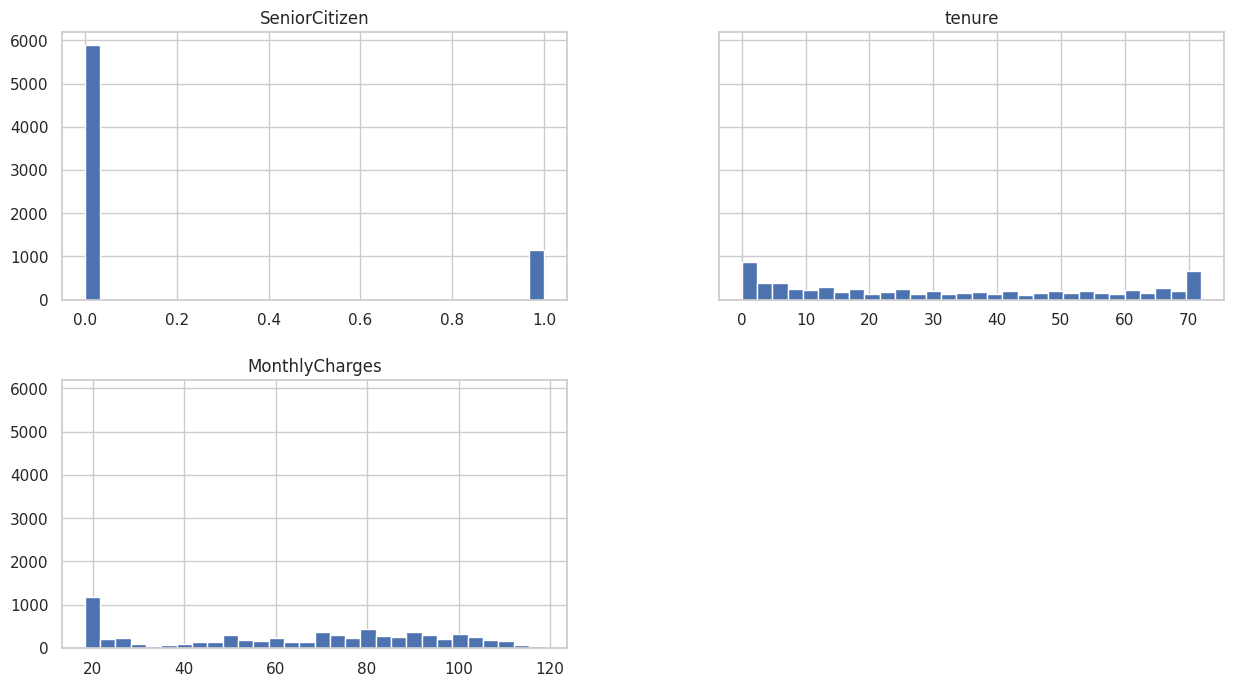

In [ ]:

%matplotlib inline
hist = df.hist(bins=30, sharey=True, figsize=(15, 8))

In [ ]:
df.drop("customerID",axis='columns',inplace=True)

# Data Preprocessing

**Encoding**

In [ ]:
def object_to_int(data):
    if data.dtype=='object':
        data = LabelEncoder().fit_transform(data)
    return data

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1


In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

**Scaling**

In [ ]:
X = df.drop('Churn', axis= 1)
y = df['Churn']

MinMaxScaler is very useful when the data is unbalanced. Algorithms like Neural Networks and KNN benefit from it.

In [ ]:
mn = MinMaxScaler()
X = mn.fit_transform(X)

**Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42)

**Overview of SMOTE (Synthetic Minority Over-sampling Technique)**

SMOTE generates synthetic samples for the minority class to balance the dataset, improving model performance, especially for imbalanced classification problems.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

To ensure a fair evaluation of the model's performance, **over-sampling should only be applied to the training data**, while the test data remains untouched. This approach allows the model to be evaluated on **real, unseen data**, providing a more accurate measure of its ability to generalize to new examples.

In [ ]:
print(y_sm.value_counts())
print(y_test.value_counts())

Churn
0    4139
1    4139
Name: count, dtype: int64
Churn
0    1035
1     374
Name: count, dtype: int64


In [ ]:
X_train.shape

(5634, 19)

# ANN

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(19,input_shape=(19,),activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_sm, y_sm,
                 batch_size=8,
                 epochs=10,
                 verbose=1)

Epoch 1/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7287 - loss: 0.5370
Epoch 2/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7772 - loss: 0.4687
Epoch 3/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7827 - loss: 0.4617
Epoch 4/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7773 - loss: 0.4573
Epoch 5/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7939 - loss: 0.4475
Epoch 6/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7915 - loss: 0.4500
Epoch 7/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7971 - loss: 0.4436
Epoch 8/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7880 - loss: 0.4464
Epoch 9/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7927 - loss: 0.4383
Epoch 10/10
1035/1035 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8026 - loss: 0.4356


In [ ]:
test_acc = model.evaluate(X_test, y_test)
print('Loss value is ',test_acc[0])
print('Accuracy value is ',test_acc[1])

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7659 - loss: 0.4943
Loss value is  0.48878213763237
Accuracy value is  0.762952446937561


In [ ]:
yp=model.predict(X_test)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In this problem, **Recall** is the most important metric because it focuses on minimizing **false negatives**. This means we prioritize correctly identifying all positive cases, even if it results in a few false positives.

In [ ]:
from sklearn import metrics

# Calculate metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, yp)
# Print metrics
print("Neural Network Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print('\nClassification Report:\n', metrics.classification_report(y_test, y_pred))



Neural Network Metrics:
Accuracy: 0.7630
Precision: 0.5437
Recall: 0.6658
F1-score: 0.5986
AUC: 0.8245

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.54      0.67      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.76      0.77      1409



In [ ]:
# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(
    conf_matrix,
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]
)
print('\nConfusion Matrix:')
print(conf_mat_df)



Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 826                 209
Actual Positive                 125                 249
